# Setup and load data

In [2]:
# Install dependencies
import tensorflow as tf
import os

In [3]:
#  Avoid OOM errors
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Remove doddy images
import cv2
import imghdr

In [5]:
data_dir = "Images"
image_exts = ['jpeg', 'jpg', 'png', 'bmp', 'svg']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path  = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not part of extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [7]:
#  Load Data
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 128 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


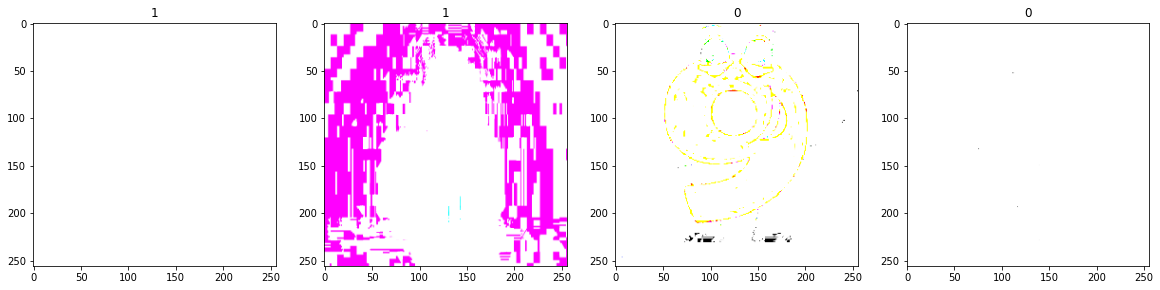

In [11]:
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # imshow(img)

# Preprocessing

In [12]:
# scale data
data = data.map(lambda x,y: (x/255,y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [14]:
#  split data
lengthData = len(data)
train_size = int(lengthData*.7)
val_size = int(lengthData*.2) + 1
test_size = int(lengthData*.1)+1

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir = 'logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir =logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 1.0436 - accuracy: 0.5625 - val_loss: 2.2663 - val_accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 3s 1s/step - loss: 1.5640 - accuracy: 0.5312 - val_loss: 0.7809 - val_accuracy: 0.4062
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: 0.6622 - accuracy: 0.6094 - val_loss: 0.6890 - val_accuracy: 0.5625
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.6832 - accuracy: 0.5312 - val_loss: 0.6284 - val_accuracy: 0.5938
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.6592 - accuracy: 0.5938 - val_loss: 0.6223 - val_accuracy: 0.7188
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.6115 - accuracy: 0.6875 - val_loss: 0.5773 - val_accuracy: 0.7812
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.5506 - accuracy: 0.7188 - val_loss: 0.6744 - val_accuracy: 0.5312
Epoch 8/20
2/2 [=========================

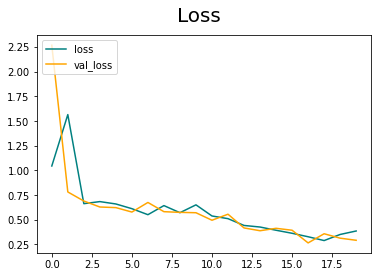

In [25]:
#  Plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')

plt.show()

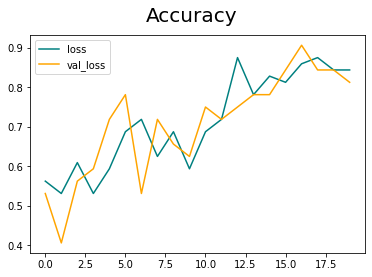

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()

# Evaluate Performance

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 259ms/step


In [34]:
print("Precision: {}, Recall: {}, Accuracy: {},"
      .format(pre.result().numpy(), re.result().numpy(), acc.result().numpy()))

Precision: 1.0, Recall: 0.7692307829856873, Accuracy: 0.90625,


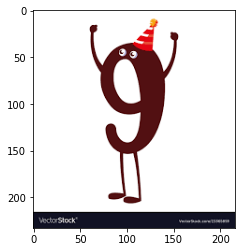

In [36]:
# Test
import cv2
img = cv2.imread('test_case.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

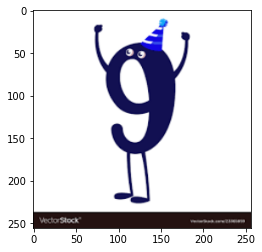

In [40]:
# fitting for the model
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 72ms/step


In [42]:
yhat

array([[0.98036575]], dtype=float32)

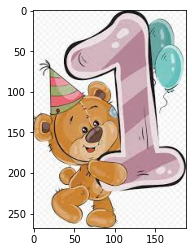

In [43]:
# 2nd test case
img = cv2.imread('test_case_2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

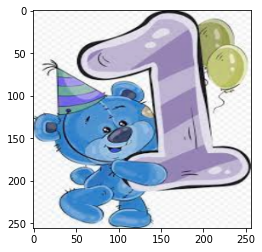

In [44]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 30ms/step


In [55]:
yhat.item()

0.1816185712814331

# Save the model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models','nineOnemodel.h5'))

In [58]:
new_model = load_model(os.path.join('models', 'nineOnemodel.h5'))

In [59]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 150ms/step


In [62]:
yhat.item()

0.1816185712814331